In [116]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv(io.BytesIO(open('results.csv', 'rb').read()))

df.dataframeName = 'results.csv'
nRow, nCol = df.shape
print(f'There are {nRow} games ')

#I want to combine home_goals and away_goals to get the total number of goals.
#I want to see whether the total of goals goes under of over 2.5

df['Total'] = df['home_goals'] + df['away_goals']

#Probability that the score goes over 2.5, 3, 3.5. Common benchmarks for wagers

prob_over_2_5 = (df['Total'] > 2.5).mean()
prob_over_3 = (df['Total'] > 3).mean()
prob_over_3_5 = (df['Total'] > 3.5).mean()

print('Over 2.5 goals ', prob_over_2_5)
print('Over 3 goals ', prob_over_3)
print('Over 3.5 goals ', prob_over_3_5)

#How likely is the home team to win?

home_prob = (df['result'] == 'H').mean()

print(home_prob)

#How likely is the away team to win?

away_prob = (df['result'] == 'A').mean()

print(away_prob)

#How likely is the draw?

draw_prob = (df['result'] == 'D').mean()

print(draw_prob)

#validation
#print(home_prob+away_prob+draw_prob)

homeprob_byteam = df[df['result'] == 'H'].groupby('home_team').size() / df['home_team'].value_counts()

print("Home Win Probability for Each Home Team:")
print(homeprob_byteam)

awayprob_byteam = df[df['result'] == 'A'].groupby('away_team').size() / df['home_team'].value_counts()

print("Away Win Probability for Each Away Team:")
awayprob_byteam.fillna(0)
print(awayprob_byteam)

home_away_difference = homeprob_byteam - awayprob_byteam

most_affected_by_home = home_away_difference.sort_values(ascending=False)
least_affected_by_home = home_away_difference.sort_values()

#Which teams are affected more by home advantage and least
print("Teams Most Affected by Home Advantage:")
print(most_affected_by_home)

print("\nTeams Least Affected by Home Advantage:")
print(least_affected_by_home)












There are 4560 games 
Over 2.5 goals  0.5118421052631579
Over 3 goals  0.2901315789473684
Over 3.5 goals  0.2901315789473684
0.46228070175438596
0.2824561403508772
0.25526315789473686
Home Win Probability for Each Home Team:
AFC Bournemouth             0.368421
Arsenal                     0.666667
Aston Villa                 0.326316
Birmingham City             0.350877
Blackburn Rovers            0.403509
Blackpool                   0.263158
Bolton Wanderers            0.377193
Brighton and Hove Albion    0.368421
Burnley                     0.368421
Cardiff City                0.263158
Charlton Athletic           0.368421
Chelsea                     0.671053
Crystal Palace              0.347368
Derby County                0.052632
Everton                     0.530702
Fulham                      0.421053
Huddersfield Town           0.315789
Hull City                   0.305263
Leicester City              0.473684
Liverpool                   0.596491
Manchester City             0.68421

There are 240 games 
Coefficient: [0.33316157]
Intercept: -2.871292582738537
Mean Squared Error: 5.081361325667225
R-squared: 0.764754626673553


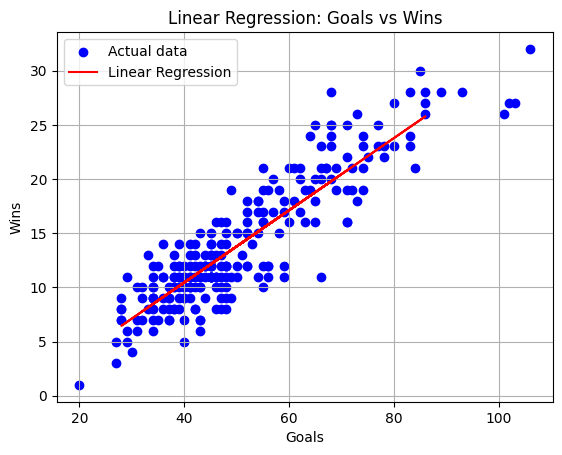

Coefficient: [-0.28446212]
Intercept: 28.75494519842313
Mean Squared Error: 7.225193586579832
R-squared: 0.6333616856779153


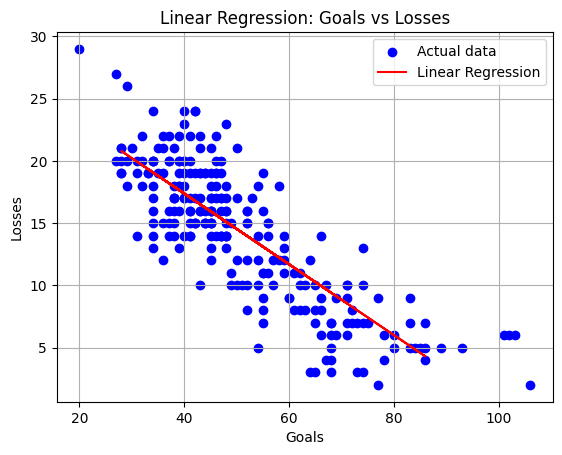

In [124]:
data = pd.read_csv(io.BytesIO(open('stats.csv', 'rb').read()))

data.dataframeName = 'stats.csv'
nRow, nCol = data.shape
print(f'There are {nRow} games ')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#I have 10 premier league teams. How much does the goal influence the wins
#Use a linear regression model

X = df[['goals']]  # Using 'goals' as the feature
y = df['wins']      # Predicting 'wins'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting wins using the test set
y_pred = model.predict(X_test)

# Model evaluation
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Plotting the linear regression line
plt.scatter(df['goals'], df['wins'], color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')

# Adding labels and title
plt.xlabel('Goals')
plt.ylabel('Wins')
plt.title('Linear Regression: Goals vs Wins')
plt.legend()
plt.grid(True)
plt.show()

#With the r squared being above 0.7, theres a high correlation between goals and wins.
#This should be intuitively obvious

X = df[['goals']]  # Using 'goals' as the feature
y = df['losses']      # Predicting 'wins'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting wins using the test set
y_pred = model.predict(X_test)

# Model evaluation
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Plotting the linear regression line
plt.scatter(df['goals'], df['losses'], color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')

# Adding labels and title
plt.xlabel('Goals')
plt.ylabel('Losses')
plt.title('Linear Regression: Goals vs Losses')
plt.legend()
plt.grid(True)
plt.show()

# As goals rack up, losses go down.
